#  tranning a Linear Regression Model To Predict SalePrice of Houses from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import copy
pd.set_option("display.max_columns", None)

from sklearn import preprocessing, metrics
from sklearn import model_selection

In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [6]:
df.shape

(1460, 81)

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    f_wb = np.dot(X,w) + b
    cost = np.sum((f_wb - y)**2) / (2 * m)
    return cost

In [8]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    f_wb = np.dot(X,w) + b
    error = f_wb -y
    gradient_w = np.dot(X.T,error)/m
    gradient_b = np.sum(error)/m
    return gradient_w, gradient_b

In [9]:
##Test Run
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([5, 8, 11])
w = np.array([2, 3])
b = 1
cost = compute_cost(X, y, w, b)
print("Cost:", cost)
gradient_w, gradient_b = compute_gradient(X, y, w, b)
print("Gradient with respect to w:", gradient_w)
print("Gradient with respect to b:", gradient_b)


Cost: 19.333333333333332
Gradient with respect to w: [13.33333333 19.33333333]
Gradient with respect to b: 6.0


In [10]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        gradient_w, gradient_b = compute_gradient(X, y, w, b)
        w = w - alpha*gradient_w
        b = b - alpha*gradient_b
        if i < 100000:
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history


In [11]:
## Test Run Gradient Descent
X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([5, 8, 11])
w_initial = np.array([2, 3])
b_initial = 1
alpha = 0.01
num_iters = 100000
result_w, result_b, J_history = gradient_descent(X, y, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters)
print("Final Parameters:")
print("w:", result_w)
print("b:", result_b)
print("Final Cost:", J_history[-1])

Iteration    0: Cost    13.90   
Iteration 10000: Cost     0.00   
Iteration 20000: Cost     0.00   
Iteration 30000: Cost     0.00   
Iteration 40000: Cost     0.00   
Iteration 50000: Cost     0.00   
Iteration 60000: Cost     0.00   
Iteration 70000: Cost     0.00   
Iteration 80000: Cost     0.00   
Iteration 90000: Cost     0.00   
Final Parameters:
w: [1.33333333 1.66666667]
b: 0.3333333333333263
Final Cost: 1.88406279530285e-28


In [12]:
def predict(X,w,b):
    predictions  = np.dot(X,w) +b
    return predictions 

In [13]:
X_new = np.array([[4, 5], [5, 6]]) 
predictions = predict(X_new, result_w, result_b) 
print("Predictions:", predictions)

Predictions: [14. 17.]


# preparing the Housing Prize Data from Kaggle
    Preparing The folds 
    Label encoding for categories 
    feature Scaling
    Tranning The model

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
def make_folds(n):
    df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
    df['Kfold'] = -1
    df = df.sample(frac =1 ,random_state = 42).reset_index(drop = True)
    y = df.SalePrice.values
    kf = model_selection.KFold(n_splits = n, shuffle = True,random_state = 42)
    for f, (t_,v_) in enumerate(kf.split(X = df)):
        df.loc[v_,'Kfold'] = f
    df.to_csv("house-prices_train_folds.csv",index = False)
make_folds(5)

In [26]:
preds = []
test_preds = []
def run(fold,num_iters,alpha):
    print(f"FOLD {fold}")
    df = pd.read_csv("/kaggle/working/house-prices_train_folds.csv")
    cat_features = [f for f in df.columns if f not in ['Id','SalePrice','Kfold']  and df.dtypes[f] == 'object']
    all_features = [f for f in df.columns if f not in ['Id','SalePrice','Kfold']]
    for col in cat_features:
        df.loc[:,col] = df[col].astype(str).fillna("None")
    for col in cat_features:
        lbl_enc = preprocessing.LabelEncoder()
        lbl_enc.fit(df[col])
        df.loc[:,col] = lbl_enc.transform(df[col])
    for col in all_features:
        df.loc[:,col] = df[col].fillna(df[col].mean())
    for col in all_features:
        scaler = preprocessing.StandardScaler()
        df.loc[:,col] = scaler.fit_transform(df[[col]].values)
    df_train = df[df.Kfold != fold].reset_index(drop = True)
    df_valid = df[df.Kfold == fold].reset_index(drop = True)
    x_train = df_train[all_features].values
    x_valid = df_valid[all_features].values
    b_initial = np.random.rand(1)
    n = x_train.shape[1]
    w_initial = np.random.sample((n,))
    result_w, result_b, J_history = gradient_descent(x_train,df_train.SalePrice.values, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters)
    fold_preds = predict(df[all_features].values,result_w,result_b)
    test_pred = predict(df_test[all_features].values,result_w,result_b)
    cost_value = compute_cost(x_valid, df_valid.SalePrice.values,result_w,result_b)
    print("================>>>>>>>>")
    print(f"Fold = {fold}, mean_squared_error(Cost) = {cost_value}")
    preds.append(fold_preds)
    test_preds.append(test_pred)

In [27]:
num_iters = 1000
alpha = 0.01
for i in range(5):
    run(i,num_iters,alpha)

FOLD 0
Iteration    0: Cost 18874277922.20   
Iteration  100: Cost 2675718866.16   
Iteration  200: Cost 809987126.84   
Iteration  300: Cost 548142329.05   
Iteration  400: Cost 505567793.06   
Iteration  500: Cost 495774464.85   
Iteration  600: Cost 492032036.94   
Iteration  700: Cost 489956680.95   
Iteration  800: Cost 488596318.05   
Iteration  900: Cost 487639273.53   
================>>>>>>>>
Fold = 0, mean_squared_error(Cost) = 370173014.10007274
FOLD 1
Iteration    0: Cost 18088719590.86   
Iteration  100: Cost 2576545899.43   
Iteration  200: Cost 693595381.22   
Iteration  300: Cost 425487432.23   
Iteration  400: Cost 383086442.03   
Iteration  500: Cost 374506155.29   
Iteration  600: Cost 371832058.65   
Iteration  700: Cost 370559230.94   
Iteration  800: Cost 369787979.16   
Iteration  900: Cost 369265372.37   
================>>>>>>>>
Fold = 1, mean_squared_error(Cost) = 1074804845.5730813
FOLD 2
Iteration    0: Cost 19036950031.49   
Iteration  100: Cost 2637265602.

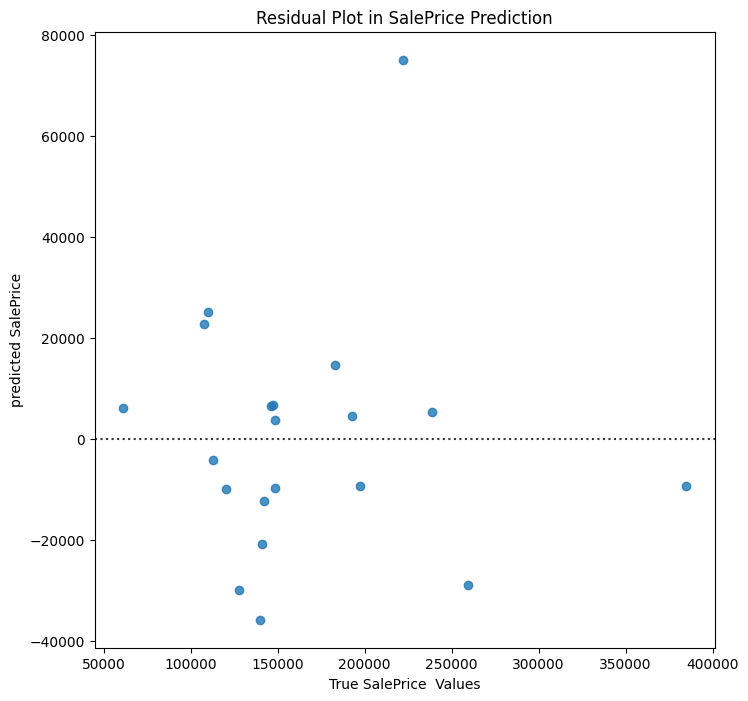

In [32]:
plt.figure(figsize=(8, 8))
sns.residplot(x=df.SalePrice.values[1000:1020], y=preds[0][1000:1020])
plt.xlabel('True SalePrice  Values')
plt.ylabel('predicted SalePrice')
plt.title('Residual Plot in SalePrice Prediction')
plt.show()

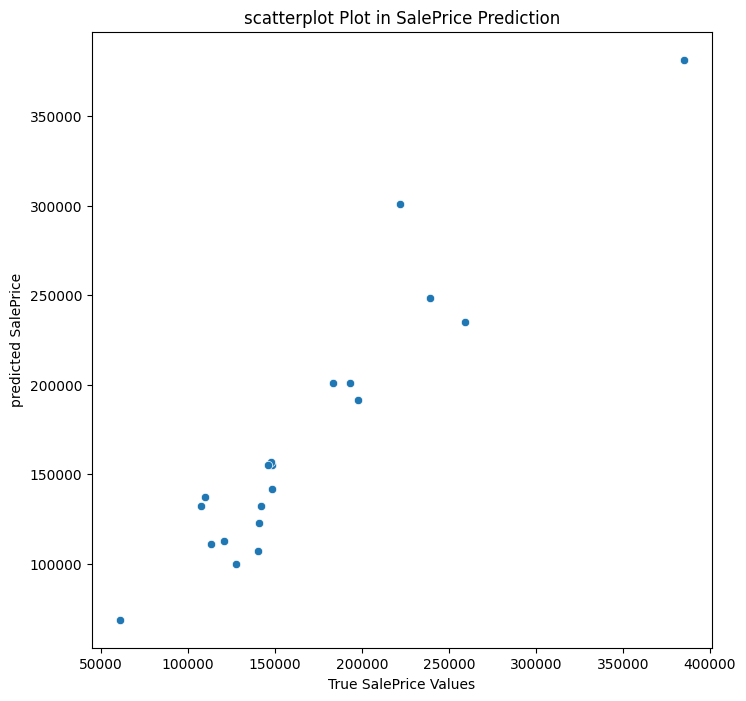

In [33]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df.SalePrice.values[1000:1020], y=preds[0][1000:1020])
plt.xlabel('True SalePrice Values')
plt.ylabel('predicted SalePrice')
plt.title('scatterplot Plot in SalePrice Prediction')
plt.show()